In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time

get_ipython().run_line_magic('matplotlib', 'inline')
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}




In [2]:
# In[2]:


#data = np.load('clusterable_data.npy')

data = genfromtxt('avgclu.csv', delimiter=',')
#data = genfromtxt('convertcsv.csv', delimiter=',')
print((data))




[[  36.06666565 -115.15000153]
 [  36.08333206 -115.08333588]
 [  36.09999847 -115.01667023]
 ...
 [  42.93333435  -78.83333588]
 [  42.95000076  -78.93333435]
 [  42.95000076  -79.        ]]


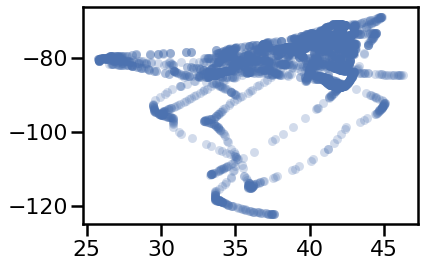

'\nframe = plt.gca()\nframe.axes.get_xaxis().set_visible(True)\nframe.axes.get_yaxis().set_visible(True)\n'

In [3]:
# In[3]:


plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
plt.show()
#print("a")
'''
frame = plt.gca()
frame.axes.get_xaxis().set_visible(True)
frame.axes.get_yaxis().set_visible(True)
'''



In [4]:

# In[4]:


def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    print(labels)
    '''j=0
    for i in labels:
        j=j+1
        if i==4:
            print(j)'''
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    #print('yo')
    plt.clf()
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    #print('ab')
    plt.show()
    
    #frame = plt.gca()
    #print('as')
    #frame.axes.get_xaxis().set_visible(False)
   #frame.axes.get_yaxis().set_visible(False)
    print('Clusters found by {}'.format(str(algorithm.__name__)))
    print('Clustering took {:.5f} s'.format(end_time - start_time))




[1 1 1 ... 0 0 0]


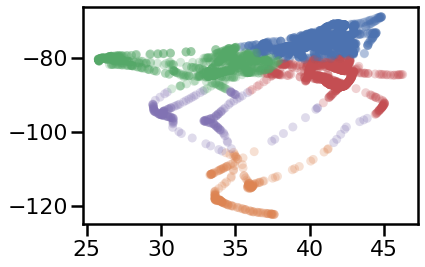

Clusters found by KMeans
Clustering took 7.42081 s


In [5]:
# In[5]:



plot_clusters(data, cluster.KMeans, (), {'n_clusters':5})




C:\Users\vishv\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass bandwidth=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[4 4 4 ... 0 0 0]


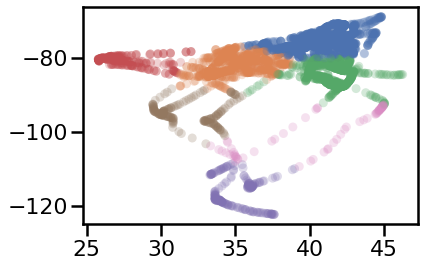

Clusters found by MeanShift
Clustering took 49.56153 s


In [6]:
# In[7]:


plot_clusters(data, cluster.MeanShift, (5,), {'cluster_all':True})




In [7]:
# In[8]:


#plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6})




[1 1 1 ... 0 0 0]


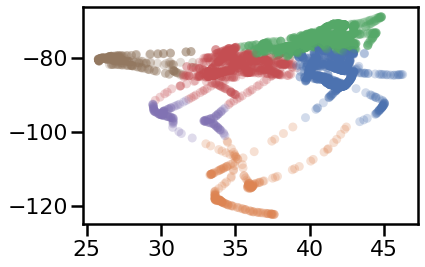

Clusters found by AgglomerativeClustering
Clustering took 4.30761 s


In [8]:
# In[9]:


plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})




[0 0 0 ... 4 4 4]


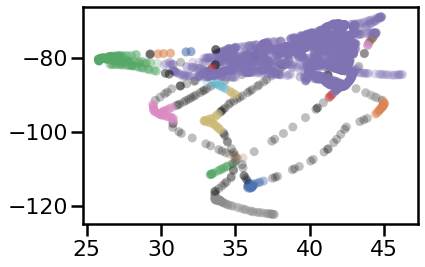

Clusters found by DBSCAN
Clustering took 0.15558 s


In [9]:
# In[15]:


plot_clusters(data, cluster.DBSCAN, (), {'eps':0.5,'min_samples':5})

